In [1]:
########### Assignmet_11 : viterbi_algorithm
########### Md Ziauddin Ridoy, 220100676, ziaridoy20@uni-koblenz.de

In [2]:
# Helps visualize the steps of Viterbi.
def print_dptable(V):
    print("    ", end=' ')
    for i in range(len(V)):
        print("%7d" % i, end=' ')
    print()

    for y in V[0].keys():
        print("%.5s: " % y, end=' ')
        for t in range(len(V)):
            print("%.7s" % ("%f" % V[t][y]), end=' ')
        print()

def viterbi(obs, states, start_p, trans_p, emit_p):
    V = [{}]
    path = {}

    # Initialize base cases (t == 0)
    for y in states:
        V[0][y] = start_p[y] * emit_p[y][obs[0]]
        path[y] = [y]

    # Run Viterbi for t > 0
    for t in range(1,len(obs)):
        V.append({})
        newpath = {}

        for y in states:
            (prob, state) = max([(V[t-1][y0] * trans_p[y0][y] * emit_p[y][obs[t]], y0) for y0 in states])
            V[t][y] = prob
            newpath[y] = path[state] + [y]

        # Don't need to remember the old paths
        path = newpath

    print_dptable(V)
    (prob, state) = max([(V[len(obs) - 1][y], y) for y in states])
    return (prob, path[state])

In [3]:
states = ('Rain', 'Dry')
 
observations = ('Low', 'High')
 
start_probability = {'Rain': 0.6, 'Dry': 0.4}
 
transition_probability = {
   'Rain' : {'Rain': 0.7, 'Dry': 0.2},
   'Dry' : {'Rain': 0.3, 'Dry': 0.8},
   }
 
emission_probability = {
   'Rain' : {'Low': 0.6, 'High': 0.4},
   'Dry' : {'Low': 0.3, 'High': 0.7},
   }

In [4]:
def example():
    return viterbi(observations,
                   states,
                   start_probability,
                   transition_probability,
                   emission_probability)
prob, path = example()
print(prob, path)

           0       1 
Rain:  0.36000 0.10080 
Dry:  0.12000 0.06720 
0.1008 ['Rain', 'Rain']


In [5]:
def line_plot_object(series):
    import pandas
    %matplotlib inline
    s = pandas.Series(series)
    return s.transpose().plot()

<AxesSubplot:>

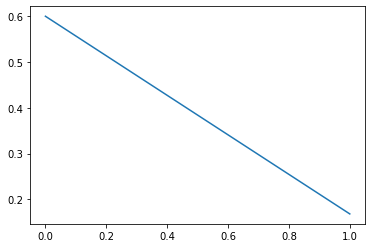

In [6]:
# plot probability path of best path
prob_path = [start_probability[path[0]]]
for t in range(1, len(path)):
    prob_path.append(prob_path[t-1] * transition_probability[path[t-1]][path[t]] * emission_probability[path[t]][observations[t]])
line_plot_object(prob_path)